# Importing some modules

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

tf.keras.backend.set_floatx('float64')
tf.random.set_seed(1)
np.random.seed(1)

# Retrieving data

In [2]:
from example import X, y

print('data shape:', X.shape, y.shape)

data shape: (1000, 1) (1000,)


In [3]:
# splitting the dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)
X_train.shape, y_test.shape

((670, 1), (330,))

# Define some activation functions

In [4]:
def polynomial_activation(x):
    batch_size, n_features = x.shape
    p = tf.range(n_features, dtype='float64')
    return x**p


def sine_activation(x):
    pass

# Build the model

In [6]:
model = Sequential()

model.add(Dense(4))

# model.add(Activation('elu'))
model.add(Lambda(polynomial_activation))


# final layer: a neuron with linear activation acts like a summation operator.
model.add(Dense(1))

opt = optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError(name='loss')

model.compile(optimizer=opt, loss=loss, metrics=['mae'])

In [7]:
# training options

# https://keras.io/api/callbacks/early_stopping/
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,
                               restore_best_weights=True)

# fit options
params = dict(epochs=100,
              batch_size=2,
              verbose=2,
              validation_split=0.2,
              callbacks=[early_stopping])

In [8]:
# train the model

history = model.fit(X_train, y_train, **params)

Epoch 1/100
268/268 - 1s - loss: 9.5324 - mae: 2.1262 - val_loss: 6.6574 - val_mae: 1.9247
Epoch 2/100
268/268 - 0s - loss: 7.0677 - mae: 1.9509 - val_loss: 4.3938 - val_mae: 1.7082
Epoch 3/100
268/268 - 0s - loss: 4.0602 - mae: 1.6398 - val_loss: 2.6466 - val_mae: 1.4360
Epoch 4/100
268/268 - 0s - loss: 2.6084 - mae: 1.4199 - val_loss: 2.0441 - val_mae: 1.2526
Epoch 5/100
268/268 - 0s - loss: 2.0667 - mae: 1.2721 - val_loss: 1.6835 - val_mae: 1.1292
Epoch 6/100
268/268 - 0s - loss: 1.6564 - mae: 1.1335 - val_loss: 1.3030 - val_mae: 0.9836
Epoch 7/100
268/268 - 0s - loss: 1.2974 - mae: 1.0019 - val_loss: 1.0054 - val_mae: 0.8508
Epoch 8/100
268/268 - 0s - loss: 1.0069 - mae: 0.8745 - val_loss: 0.7690 - val_mae: 0.7460
Epoch 9/100
268/268 - 0s - loss: 0.7527 - mae: 0.7564 - val_loss: 0.6195 - val_mae: 0.6765
Epoch 10/100
268/268 - 0s - loss: 0.5542 - mae: 0.6450 - val_loss: 0.4542 - val_mae: 0.5815
Epoch 11/100
268/268 - 0s - loss: 0.3940 - mae: 0.5399 - val_loss: 0.2956 - val_mae: 0.46

# Model accuracy with MAE

In [9]:
p = model.predict(X_test).flatten()
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy()

p = model.predict(X_train).flatten()
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy()

print('MAE for training set: %.2e' % mae_train)
print('MAE for test     set: %.2e' % mae_test)

MAE for training set: 2.53e-13
MAE for test     set: 2.83e-13


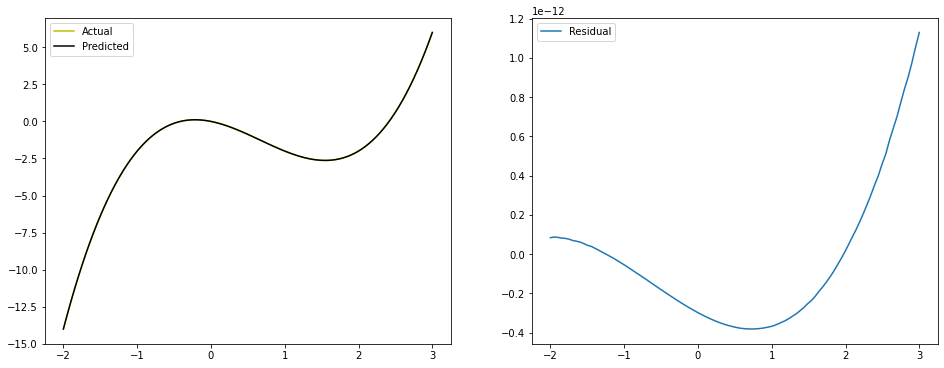

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

from example import a, b, f

xx = np.linspace(a, b, 100)
yy = f(xx)
pp = model.predict(xx.reshape(-1, 1)).flatten()

ax1.plot(xx, yy, 'y-', label='Actual')
ax1.plot(xx, pp, 'k-', label='Predicted')
# ax1.plot(X_train, y_train, 'rx', label='Train data', markersize=1)
# ax1.plot(X_test, y_test, 'bo', label='Test data', markersize=1)

ax2.plot(xx, yy - pp, label='Residual')

ax1.legend()
ax2.legend()

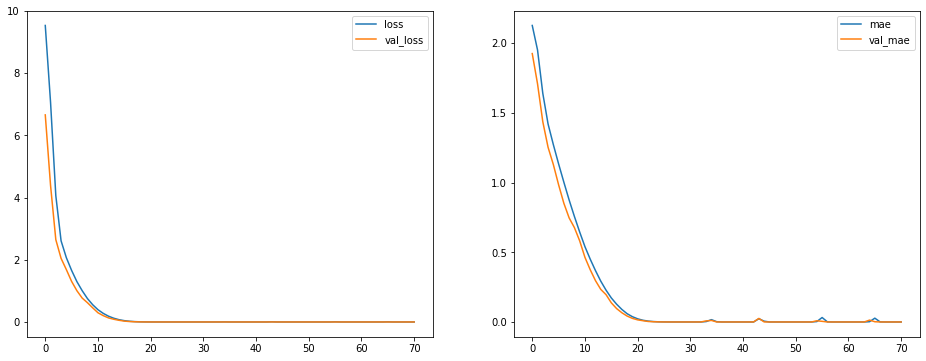

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

ax1.plot((loss), label='loss')
ax1.plot((val_loss), label='val_loss')
ax1.legend()

ax2.plot((mae), label='mae')
ax2.plot((val_mae), label='val_mae')
ax2.legend()

# Test the model on a long interval

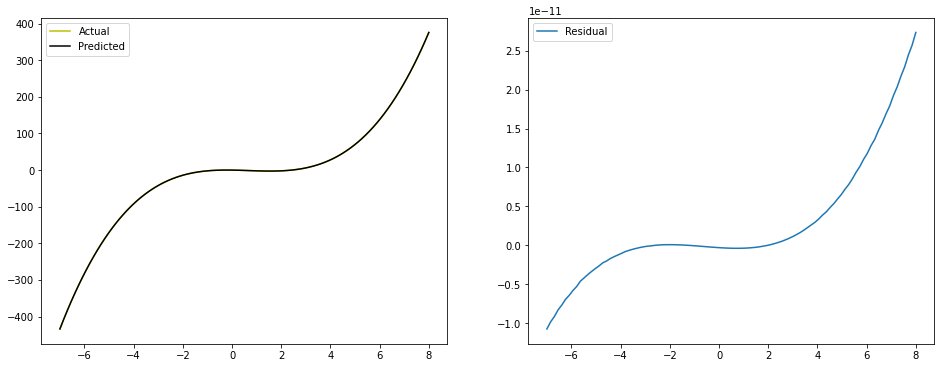

In [12]:
# Extrapolation test

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

xx = np.linspace(a - (b - a), b + (b - a), 100)
yy = f(xx)
pp = model.predict(xx.reshape(-1, 1)).flatten()

ax1.plot(xx, yy, 'y-', label='Actual')
ax1.plot(xx, pp, 'k-', label='Predicted')

ax2.plot(xx, yy - pp, label='Residual')

ax1.legend()
ax2.legend()